# Spectra acquisiton
Control both the stepping motor and the camera from this notebook.<br>
Make a loop to measure a wide-range spectrum automatically.

NOTE: only one connection to COM port is possible at a time. Shut down other connections, either in python or dedicated software.

In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time, os, logging
from FLI import FLI
import numpy as np
import xarray as xr
from os.path import join
import datetime

In [3]:
%run thr640.py
%run imaging_tool.py

In [6]:
logger = logger
logger.setLevel(50) # 10 - DEBUG 50 - CRITICAL 20 - INFO
camera = FLI()
step_motor = THR640() # Can only have one instance.

In [7]:
basepath = r'\\10.249.254.51\Public\BACK_UP\hashizuka\thesis(master)\data\Czerny\1115'
# basepath = r'C:\Users\fujii\Documents\python\kuzmin\kurokawa\20221111'
if not os.path.exists(basepath):
    os.makedirs(basepath)

In [8]:
ccw_limit = 0
cw_limit = 1030000


### $\alpha$ 411,000
### $\beta$ 595,000
### $\gamma$ 644,000
### $\delta$ 666,000
### OI 213,000

# Single

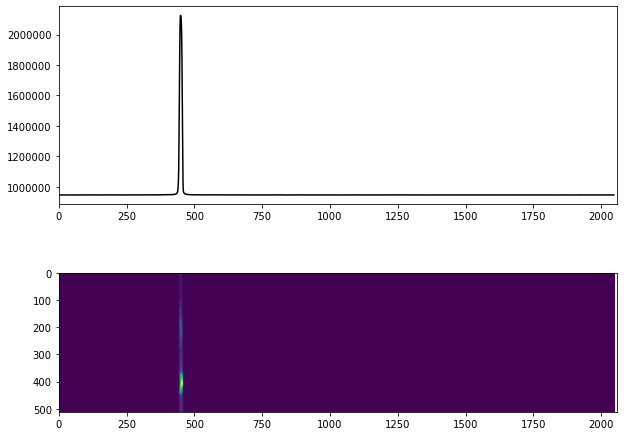

In [11]:
name=("O2lamp_test")
exposure = 0.1 * 1e3 # ms
tag=""
# count=450000 # 615 nm
# count=740000 # 307.5 nm
# count=800000 # 226 nm
# count=100000 # 840 nm
# count=585000 # Hgamma
# count=635000 # Hbeta
count=408000 # Halpha
# count=256000 # O2
# count=175000
# count = 20000
# count = 466000

step_motor.goto(count)
step_motor.waitUntilReady()
vbin = 1
attributes = {
    "temperature": camera.getTemperature(),
    "device_status": camera.getDeviceStatus(),
    "exposure": exposure,
    "frame_type": "light",
}
camera.setExposureTime(exposure);camera.setVBin(vbin);camera.setImageArea(10,0,2058,512//vbin);camera.exposeFrame()
time.sleep(.1)
# load image
image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16))
# convert to xarray
data = xr.DataArray(
    image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes
)
# save data as NetCDF file
filepath = join(basepath,f'{name}-{count}-{exposure}ms-{tag}.nc')
data.to_netcdf(filepath)
plot_image(image_data)

# LOOP

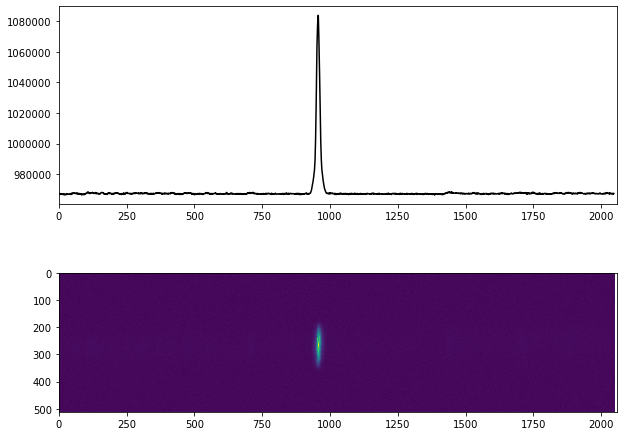

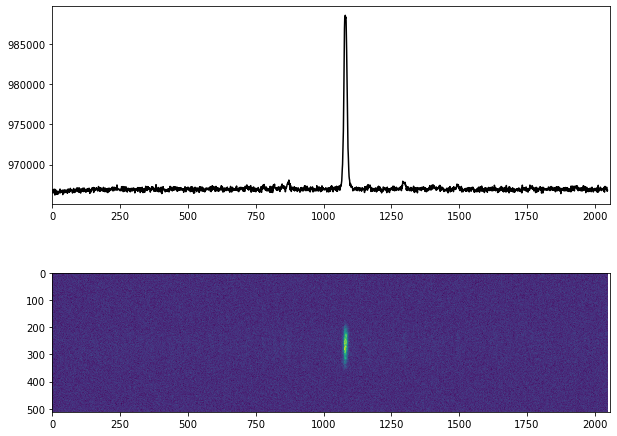

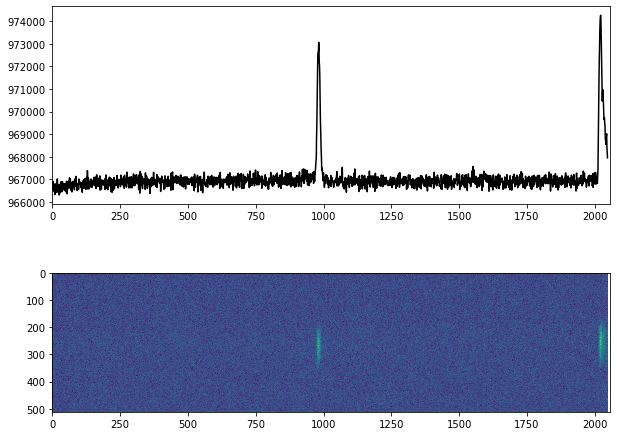

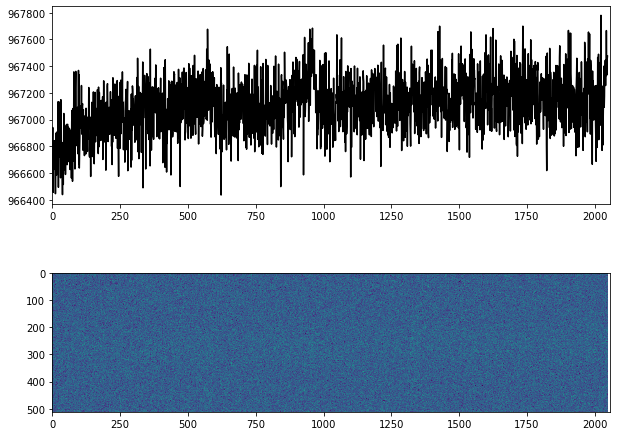

In [7]:
import mkse as mk

name=("H2") #background
tag=""
ampere = 3
# R = range(200000,805000,5000)
# R = [211000,212000,215000,216000]
# R = [199000,200000,210000,390000,400000,410000,575000, 585000, 595000]
#R = [410000]
#R = [211000,212000,213000,214000,215000,409000,410000,411000,412000,413000,593000,594000,595000,596000,597000] #O1
#R = [409000,410000,411000,412000,413000] #alpha
#R = [593000,594000,595000,596000,597000] #beta 
# R = [642000,643000,644000,645000,646000,664000,665000,666000,667000,668000] #gamma
#R = [664000,665000,666000,667000,668000] #delta
# R = [(i+1)*1000 for i in range(5)]
R = [456000,464000,472000,480000]
# T = [10e3,60e3,60e3,60e3]
# R = [215000] # filterLIBS
# T = [300e3] # filterLIBS
# R = [213000,411000,595000] 
T = [100e3]*len(R)
# T = [60e3]*9
# T = [60e3]*6
# T = [10e3]*4 #H2onlyloop
# T = [100e3,50e3,50e3,50e3] #H2O2loop
# T = [10e3]*100
hour=datetime.datetime.now().hour;minute=datetime.datetime.now().minute


for i in range(len(R)):
    if ccw_limit < R[i] < cw_limit:
        step_motor.goto(R[i]);step_motor.waitUntilReady();vbin = 1
        attributes = {
            "temperature": camera.getTemperature(),
            "device_status": camera.getDeviceStatus(),
            "exposure": T[i],
            "frame_type": "light",
        }
        camera.setExposureTime(T[i]);camera.setVBin(vbin);camera.setImageArea(10,0,2058,512//vbin);camera.exposeFrame()
        time.sleep(.1)
        
        image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16)) # load image
        data = xr.DataArray(image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes) # convert to xarray
        plot_image(image_data)
        filepath = join(basepath,f'{name}-{R[i]}-{T[i]}ms-{ampere}A-{tag}-{hour}{minute}.nc')
        # filepath = join(basepath,f'{name}-{R[i]}-{T[i]}ms-{hour}{minute}-{tag}.nc')
        data.to_netcdf(filepath) # save data as NetCDF file
    else:
        print("out of range")
        break

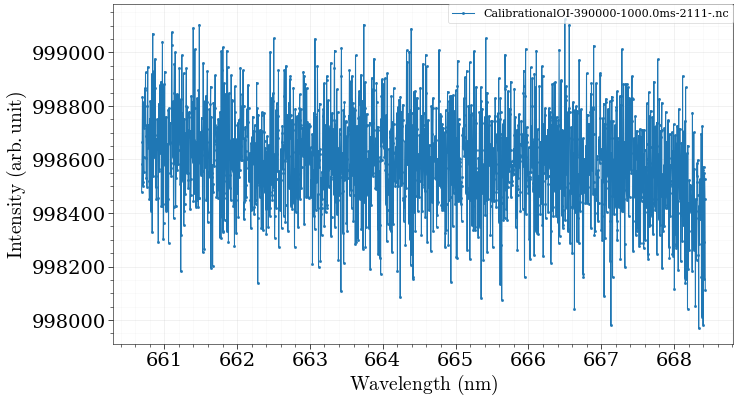

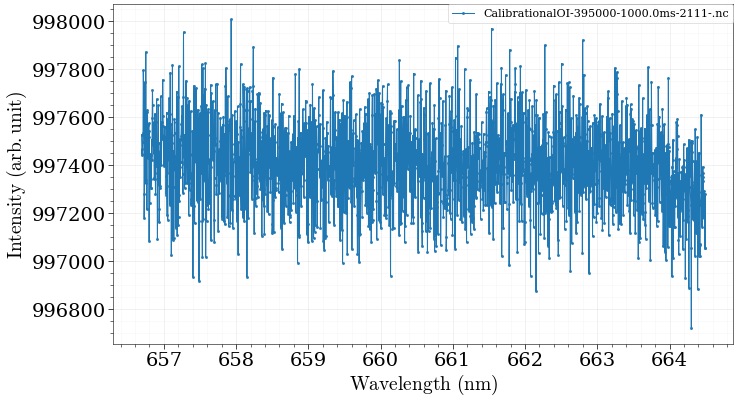

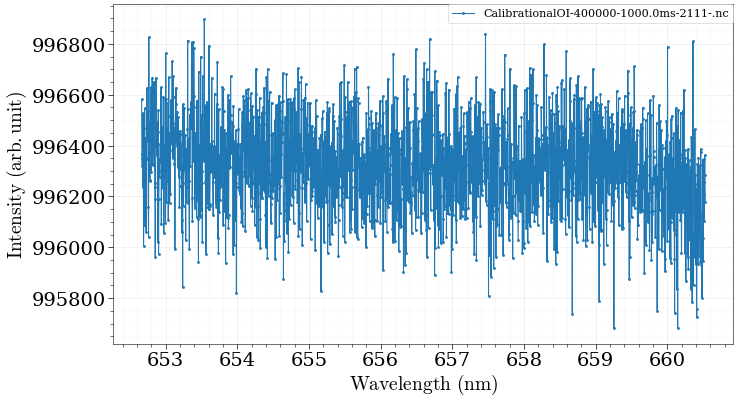

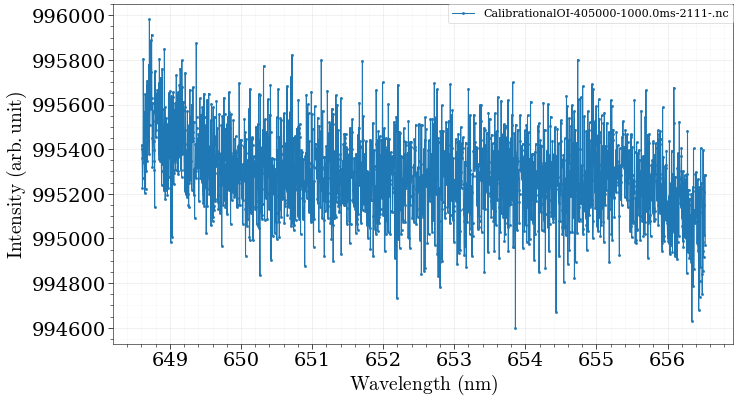

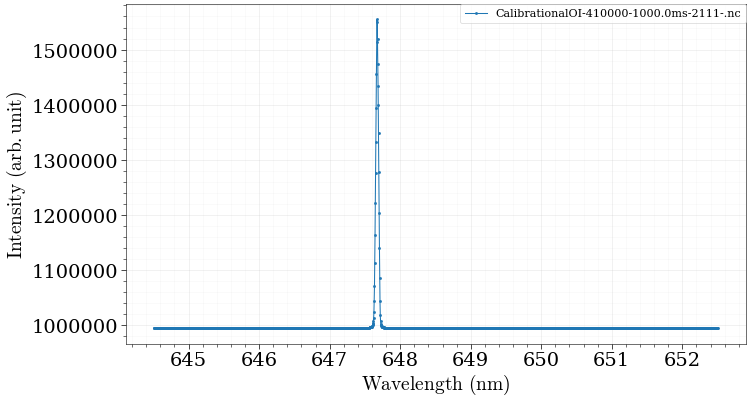

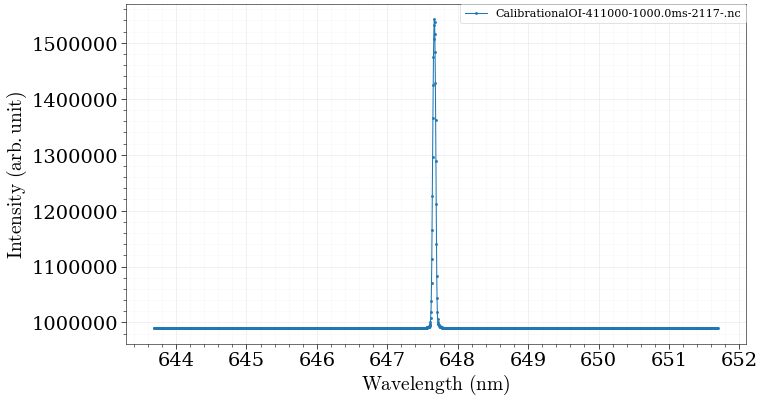

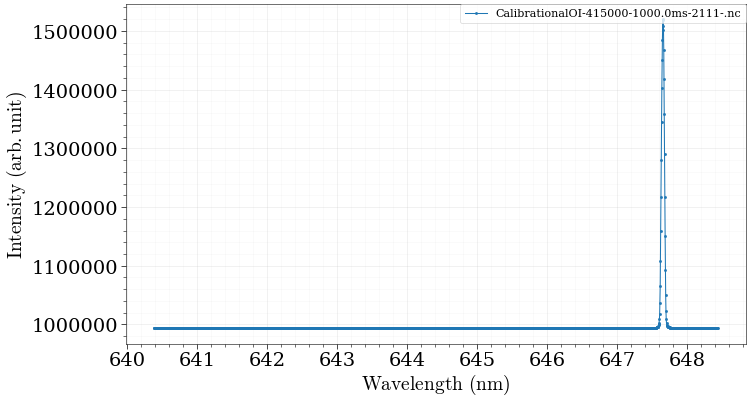

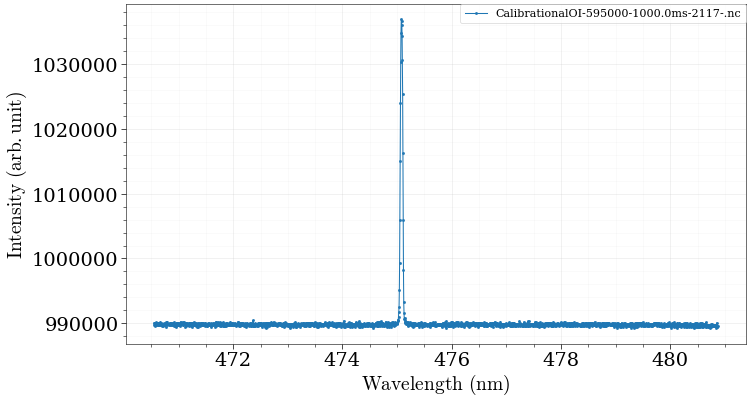

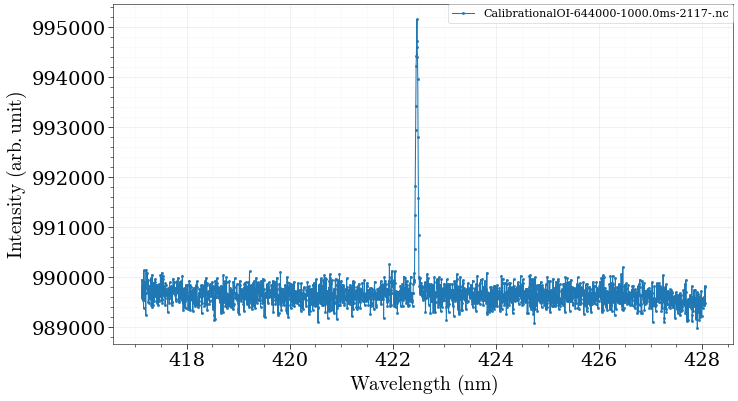

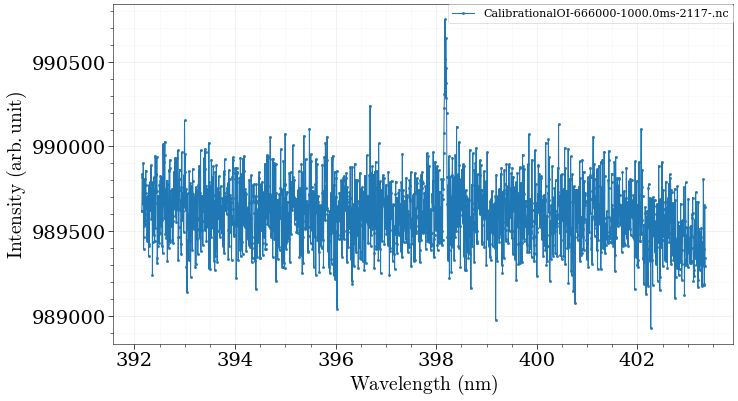

In [ ]:
import mkse as mk

mk.mkses.basepathis(r"\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20221122_calibration")
# mk.mkses.basepathis(r'C:\Users\fujii\Documents\python\kuzmin\miura\20221115')
# print(mk.mkses.basefiles)
# mk.display_nc(mk.mkses.basefiles[0])
mk.display_nc_all()